## K-Nearest Neighbors

K-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Functions to calculate TPR and FPR

In [2]:
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

In [8]:
SMdata = pd.read_csv('SMData.csv')
SMdata = SMdata.drop(columns = ['Unnamed: 0'])
SMdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    Debt ratio %                                             13198 non-null  float64
 1    Borrowing dependency                                     13198 non-null  float64
 2    Liability to Equity                                      13198 non-null  float64
 3    Net Income to Stockholder's Equity                       13198 non-null  float64
 4    Persistent EPS in the Last Four Seasons                  13198 non-null  float64
 5    ROA(C) before interest and depreciation before interest  13198 non-null  float64
 6    Net worth/Assets                                         13198 non-null  float64
 7    ROA(B) before interest and depreciation after tax        13198 non-null  float64
 8    ROA(A) before i

In [9]:
x = SMdata.drop(columns = ["Bankrupt?"])
y = pd.DataFrame(SMdata["Bankrupt?"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

In [10]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train, y_train.values.ravel())

y_pred = classifier.predict(x_test)

### Confusion Matrix

KNN Classifier Confusion Matrix
Classification Accuracy:  0.9252525252525252
TPR:  0.9811320754716981
FPR:  0.1295647823911956


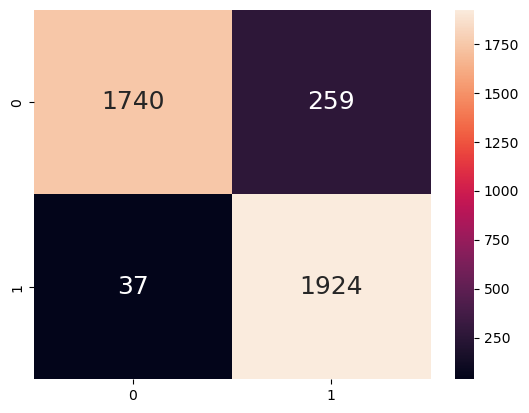

In [11]:
print("KNN Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18})

print("Classification Accuracy: ", classifier.score(x_test, y_test))
print('TPR: ', get_TPR(y_test, y_pred))
print('FPR: ', get_FPR(y_test, y_pred))

### F1 Score

In [12]:
print('KNN TEST F1 Score: {}'.format(f1_score(y_test,y_pred)))

KNN TEST F1 Score: 0.9285714285714285
